In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/prevalence-by-mental-and-substance-use-disorder (1).csv")
df.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 5   Preval

In [ ]:
df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
df.size

75240

In [ ]:
df.shape

(6840, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=l.fit_transform(df[i])


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

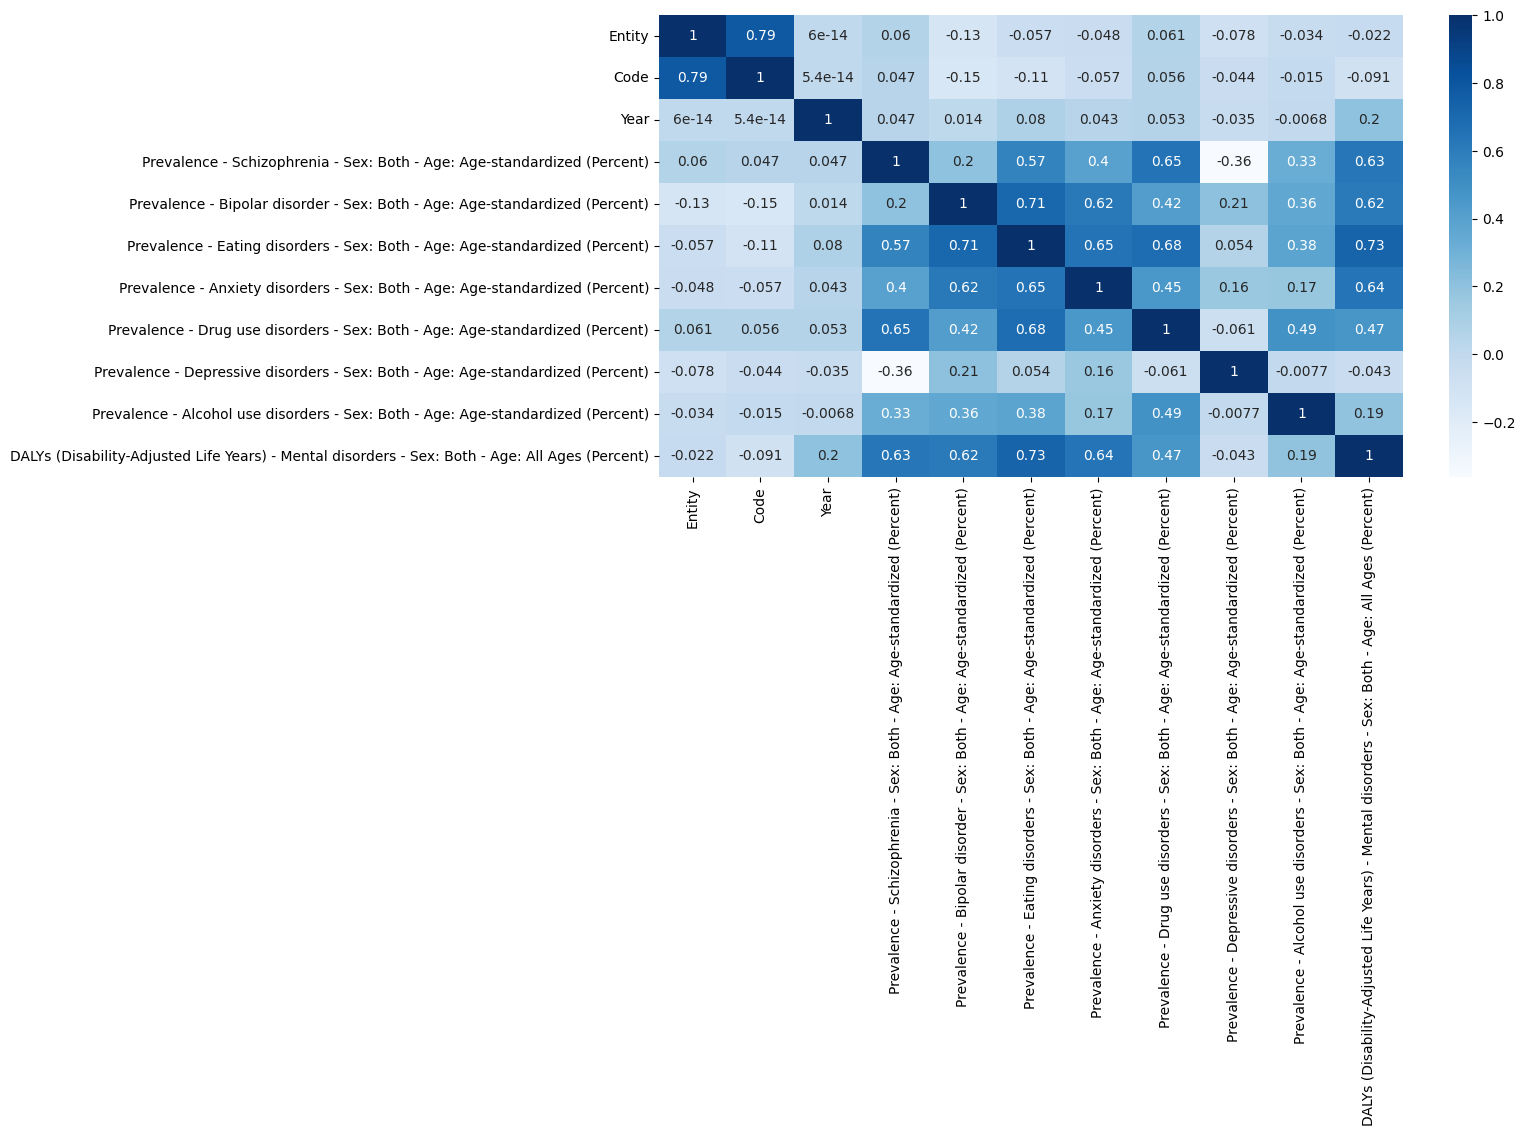

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.plot

In [ ]:
sns.pairplot(df,corner=True)
plt.show()

In [ ]:
mean=df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].mean()
mean

4.818061811758918

In [ ]:
fig=px.pie(df,values='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',names='Year')
fig.show()

In [ ]:
fig=px.line(df,x='Year',y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',color='Entity',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [ ]:
x=df.drop('DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',axis=1)
y=df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
xtrain.head(5)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
839,27,27,2019,0.329339,0.656791,0.459976,3.093946,0.859447,1.736138,0.975514
5815,193,175,2015,0.256836,0.814188,0.174171,5.867417,0.364848,4.231454,0.420401
4405,146,205,2015,0.353118,0.832142,0.425403,5.065427,1.679728,3.939009,2.055928
3813,127,121,1993,0.305036,0.576889,0.145265,3.892060,0.651911,3.042269,2.054189
3442,114,128,2012,0.326715,0.357418,0.145606,4.838487,0.585521,3.679132,0.531266


In [ ]:
xtest.head(5)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
4143,138,131,1993,0.220314,0.557777,0.099236,2.971630,0.271602,4.224348,0.481681
1260,42,39,1990,0.323175,0.295753,0.130021,4.100610,0.772461,3.282559,0.798645
4329,144,123,1999,0.336209,0.296241,0.175765,4.202445,0.779471,2.814324,1.008391
2261,75,66,2001,0.215107,0.550132,0.097027,2.985863,0.442802,4.417528,0.530308
2434,81,67,1994,0.211178,0.541067,0.089330,3.327791,0.249130,4.283293,0.473574


In [ ]:
ytrain.head(5)

839     6.056265
5815    4.583907
4405    6.861558
3813    5.304653
3442    6.985695
Name: DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent), dtype: float64

In [ ]:
ytest.head(5)

4143    1.178219
1260    4.244917
4329    5.823644
2261    2.150069
2434    1.108290
Name: DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent), dtype: float64

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5472, 10)
(1368, 10)
(5472,)
(1368,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrain_pred=lr.predict(xtrain)


In [ ]:
mse=mean_squared_error(ytrain,ytrain_pred)


In [ ]:
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))

In [ ]:
r2=r2_score(ytrain,ytrain_pred)

In [ ]:
print(mse)
print(rmse)
print(r2)


1.3714974376173674
1.1711094900210515
0.7447603979543544


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
ytrain_pred=rf.predict(xtrain)

In [ ]:
mse=mean_squared_error(ytrain,ytrain_pred)

In [ ]:
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))

In [ ]:
r2=r2_score(ytrain,ytrain_pred)

In [ ]:
print(mse)
print(rmse)
print(r2)

0.005043347458628429
0.07101652947468236
0.9990614185903588


In [ ]:
ytest_pred=lr.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

In [ ]:
print(mse)
print(rmse)
print(r2)

1.1232990389891233
1.059858027751417
0.7664866778436811


In [ ]:
ytest_pred=rf.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

In [ ]:
print(mse)
print(rmse)
print(r2)

0.02917781529839793
0.1708151494990943
0.993934465937295
